# Linear classification

## Perceptron algorithm for linear classification

The goal of this exercise is to implement the perceptron algorithm (batch and online) for binary linear classification on a simple artificial dataset. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Online version

We start by generating a classification dataset with 100 examples. You do not need to read the code generating the data.

In [2]:
def create_dataset(n_samples):
    rng = np.random.default_rng()
    X = rng.uniform(0.0, 1.0, (n_samples, 2))
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples)])
    return X, t

X, t = create_dataset(100)

Let's visualize the training set now in the following cell. Samples of the positive class (t=1) will be represented by blue points, examples of the negative class (t=-1) by orange ones.

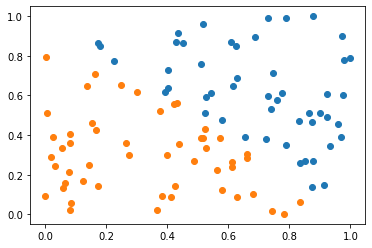

In [3]:
plt.figure()
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

You will now implement the **online version of the Perceptron algorithm** to classify this data set.

As a reminder from the course, we will use an hyperplane $(\mathbf{w}, b)$ to **predict** whether an input $\mathbf{x}_i$ belongs to the positive class (+1) or negative class (-1) using the following function:

$$
    y_i =  \text{sign}( \langle \mathbf{w} . \mathbf{x}_i \rangle + b)
$$

Our goal is to minimize the **mean square error** (mse) of the hyperplane on the training set:

$$
    L(\mathbf{w}, b) = \frac{1}{2N} \, \sum_{i=1}^N (t_i - y_i)^2
$$

By applying gradient descent on this loss function, we obtain the **delta learning rule**:

$$
    \Delta \mathbf{w} = \eta \, \sum_{i=1}^N (t_i - y_i)
$$

$$
    \Delta b = \eta \, \sum_{i=1}^N (t_i - y_i) 
$$

The online version of the Perceptron is given by the following algorithm:

$\text{Initialize the weight vector } \mathbf{w} \text{ and the bias } b.$

$\textbf{for } M \text{epochs:}$

$\qquad \textbf{forall } \text{examples } (\mathbf{x}_i, t_i) :$

$\qquad \qquad y_i =  \text{sign}( \langle \mathbf{w} . \mathbf{x}_i \rangle + b)$

$\qquad \qquad \mathbf{w} \gets \mathbf{w} + \eta \, (t_i - y_i) \, \mathbf{x}_i$

$\qquad \qquad b \gets b + \eta \, (t_i - y_i)$


**Q:** Implement the algorithm based on the linear regression algorithm of last exercise. The only differences are that updates are **online** and that the weight vector is now a vector... You will need to use `np.dot`. Use 20 epochs and a learning rate of 0.01 at first, but you can vary it later. Initialize the weight vector and the bias to 0. Make a plot of the mse during training.

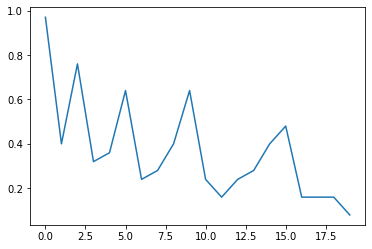

In [4]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
losses = []

for epoch in range(nb_epochs):
    loss = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction of the hypothesis
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        
    # Append 
    losses.append(loss/N)
    
plt.figure()
plt.plot(losses)
plt.show()

**Q:** Visualize the hyperplane. If we call $x_0$ and $x_1$ the two coordinates of the inputs, the equation of the hyperplane is:

$$w_0 \, x_0 + w_1 \, x_1 + b = 0$$

which takes the form:

$$x_1 = - (w_0 \, x_0 + b) / w_1$$

You just need to draw a line between the two extremities of the hyperplane, for example between 0 and 1 or between `X[:, 0].min()` and `X[:, 0].max()`.

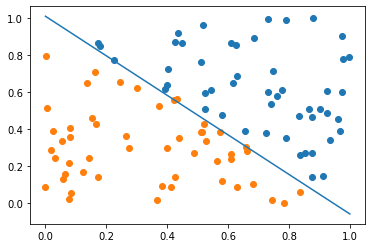

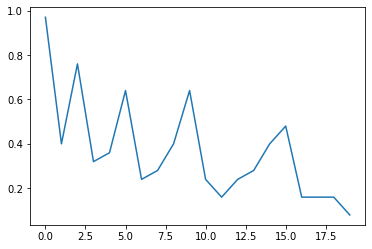

In [5]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
losses = []

for epoch in range(nb_epochs):
    loss = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction of the hypothesis
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        
    # Append 
    losses.append(loss/N)

plt.figure() 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure()
plt.plot(losses)
plt.show()

Before going further, let's track the evolution of the classification error during learning, defined as the fraction of incorrectly classified examples during one epoch:

$$
    \epsilon = \frac{\text{# misclassifications}}{N}
$$

**Q:** Modify your algorithm to compute the training error and the mse loss for each epoch. How do the training error and loss evolve during learning? Do you really need both?

*Tips:* When iterating over each training example, you will need to increment a counter for misclassifications when your prediction `y_i` is different from `t[i]` (use `!=` for "not equal"). 

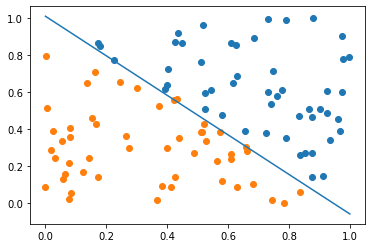

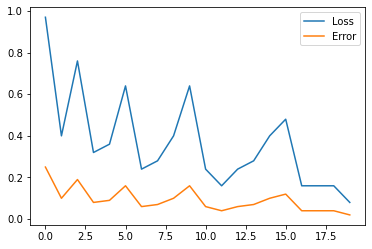

In [6]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction of the hypothesis
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

plt.figure() 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure()
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:** The training error and the loss vary together, by definition. The scale of the loss is somewhat arbitrary, while the error corresponds to what we want. If you have to choose, visualize the error.

Both go down during learning (hopefully), but there are oscillations: this is due to the online version of the Perceptron, which is not stable.

**Q:** Now is the time to play with the hyperparameters:
    
1. Vary the learning rate `eta` between extreme values (from 0.000001 to 100.0). 
2. Increase the number of epochs `nb_epochs`.

What does it change?    

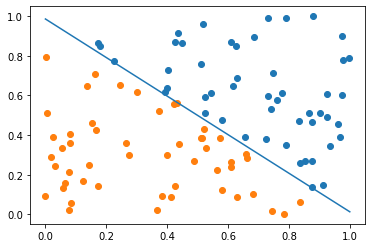

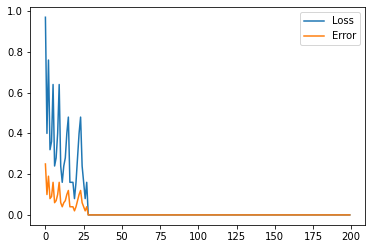

In [7]:
# Parameters
eta = 0.0001
nb_epochs = 200
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction of the hypothesis
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

plt.figure() 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure()
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:**

The learning rate does not change much... We will see why in the next question.

After a minimum of epochs, the result is stable, because there are no errors anymore: `T[i] - y_i` is always 0, so the weight vector and the bias are not changed anymore.

**Q:** Change the initial value of the weight vector $\mathbf{w}$ to something different from 0 (e.g. [1, -1], [-5, 5], etc). What does it change? Vary the learning rate again and conclude on the importance of weight initialization.

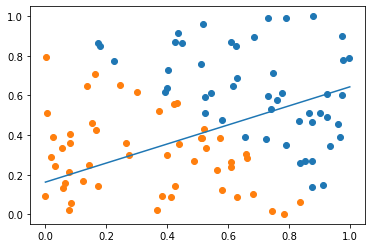

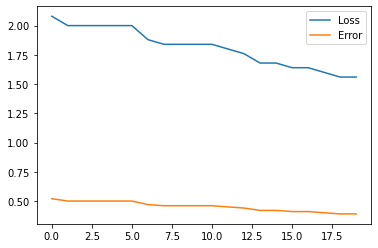

In [8]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.array([-10., 10.])
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction of the hypothesis
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

plt.figure() 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure()
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:** contrary to the case where the weight vector is initially 0, the learning rate had a big influence on the learning speed when the initial weight vector is non-zero. It is even worse with big weights ([-10, 10]).

The explanation lies on the incremental nature of the perceptron learning rule:

$$
    \mathbf{w} \leftarrow \mathbf{w} + \eta \, (t - y) \, \mathbf{x}
$$

If $\mathbf{w}$ is initially small, the first couple of errors will bring $\mathbf{w}$ in the right direction very fast. As its norm does not matter for the classification, only the bias will have to grow incrementally.

If $\mathbf{w}$ is initially big, you will need a lot of iterations to bring it in the right direction, as you only add small errors at each time step. The learning rate will then influence a lot the speed of convergence.

### Non-linearly separable data

The generated dataset was obviously linearly separable, because you found a linear hyperplane able to classify it... Let's now see what happens when you apply your algorithm on a non-linearly separable dataset. It is basically the same method as before, except that two data points have their class changed (from +1 to -1 and vice versa).

In [35]:
def create_dataset(n_samples):
    rng = np.random.default_rng()
    X = rng.uniform(0.0, 1.0, (n_samples, 2))
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples)])
    idx = rng.choice(100, 2)
    t[idx] = - t[idx]
    return X, t

X, t = create_dataset(100)

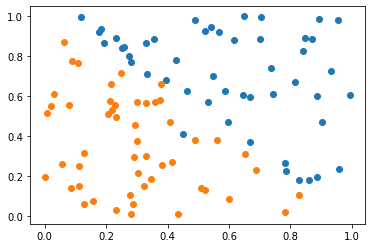

In [36]:
plt.figure()
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

**Q:** Apply your online Perceptron algorithm (with default values: `eta = 0.1`, `nb_epochs = 100`,$\mathbf{w}$ and $b$ initialized to 0) to the non-linear data. What do you observe? Is it a satisfying result? Does it get better when you change the learning rate or weight initialization?

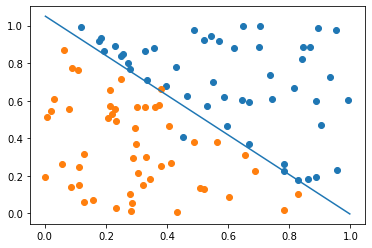

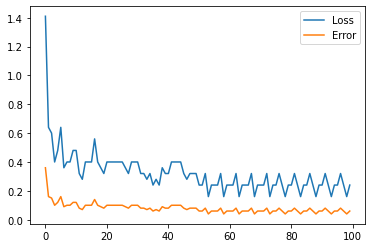

In [37]:
# Parameters
eta = 0.1
nb_epochs = 100
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction of the hypothesis
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

plt.figure() 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure()
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

### Batch version 

Let's now implement the batch version of the Perceptron algorithm for comparison. The algorithm is theoretically:

$\text{Initialize the weight vector } \mathbf{w} \text{ and the bias } b.$

$\textbf{for } M \text{epochs:}$

$\qquad \text{Initialize weight and bias changes } \Delta \mathbf{w} = 0\, , \, \Delta b = 0$

$\qquad \textbf{forall } \text{examples } (\mathbf{x}_i, t_i) :$

$\qquad \qquad y_i =  \text{sign}( \langle \mathbf{w} . \mathbf{x}_i \rangle + b)$

$\qquad \qquad \Delta \mathbf{w} \gets \Delta \mathbf{w} + (t_i - y_i) \, \mathbf{x}_i$

$\qquad \qquad \Delta b \gets \Delta b + (t_i - y_i)$

$\qquad \mathbf{w} \gets \mathbf{w} + \eta \, \Delta \mathbf{w}/N$

$\qquad b \gets b + \eta \, \Delta b/N$

Here we will use the numerical abilities of numpy to avoid the `for` loop over the training examples. As `X` s a `(N, d)` matrix, you can obtain a vector of predictions using directly matrix-matrix multiplications:

```python
y = np.sign(np.dot(w, X.T) + b)
```

`y` is now a vector of predictions using the current hyperplane, you can apply the **batch** delta learning rule in just two lines:

```python
w += eta * np.dot((t - y),  X) / N
b += eta * np.mean(t - y)
```

`np.mean()` allows to compute directly the average of the delta terms over the whole data.

The error and the loss are also easy to compute:

```python
error = np.mean(t != y)
loss = np.mean((t - y)**2)
```

**Q** Implement the batch version of the Perceptron algorithm. Train it on the non-linear dataset using different parameters (vary the learning rate and weight initialization). Compare its performance to the online version. 

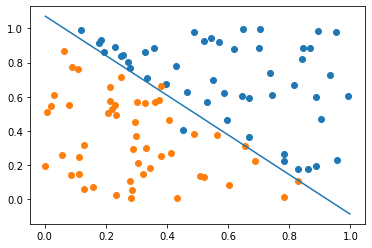

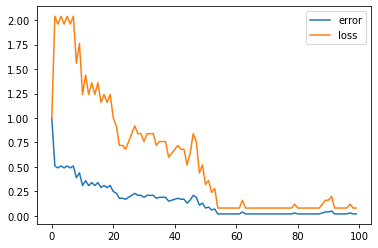

In [40]:
# Parameters
eta = 0.1
nb_epochs = 100
N = len(t)

# Weight vector and bias
w = np.zeros(2)
b = 0.

# Batch Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    
    # Compute the prediction for the whole training set
    y = np.sign(np.dot(w, X.T) + b)
    
    # Update the weight vector
    w += eta * np.dot((t - y),  X) / N
    
    # Update the bias
    b += eta * np.mean(t - y)
    
    # Compute the error and loss
    error = np.mean(t != y)
    loss = np.mean((t - y)**2)
    
    errors.append(error)
    losses.append(loss)
    
plt.figure()
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])

plt.figure()
plt.plot(errors, label="error")
plt.plot(losses, label="loss")
plt.legend()
plt.show()

**A:** the batch version is indeed slower than the online version, but it finds a much better solution when the data is not strictly linearly separable.

*Note:* this statement might depend on the data... Regenerate the dataset if you observe the contrary ;)